# Titanic Disaster

- Predicted by *Anh-Thi DINH*.
- Kaggle challenge's [URL](https://www.kaggle.com/c/titanic).

## Overview

### The challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?

In this competition, you'll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the "ground truth".

The `test.csv` dataset contains similar information but does not disclose the "ground truth" for each passenger. It's your job to predict these outcomes.

Using the patterns you find in the `train.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

Check out the "Data" tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

## Data's description

### Overview

The data has been split into two groups:

- training set (`train.csv`)
- test set (`test.csv`)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the "ground truth") for each passenger. Your model will be based on "features" like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

|Variable|Definition|Key|
|--- |--- |--- |
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

- `pclass`: A proxy for socio-economic status (SES)
  - `1st` = Upper
  - `2nd` = Middle
  - `3rd` = Lower
- `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- `sibsp`: The dataset defines family relations in this way...
  - `Sibling` = brother, sister, stepbrother, stepsister
  - `Spouse` = husband, wife (mistresses and fiancés were ignored)
- `parch`: The dataset defines family relations in this way...
  - `Parent` = mother, father
  - `Child` = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore `parch=0` for them.

## Overview the dataset

First, we need to have a look on the dataset in order to see what's in it? After having a better understanding on the dataset, we'll go deeply on the cleaning step.

We import some necessary libraries for this projects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # plot
import pandas as pd # working with dataset

# show the plots inside the notebook
%matplotlib inline

Read the datasets `train.csv` and `test.csv`,

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Train dataset's shape: ", df_train.shape)
print("Test dataset's shape: ", df_test.shape)

Train dataset's shape:  (891, 12)
Test dataset's shape:  (418, 11)


Check first few elements of dataset

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Get some infos of dataset.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


**Comments**:

0. 38% out of the training-set survived the Titanic.
1. We can see that, there are 891 passengers in dataset `df_train` and 418 in `df_test`. Most of the fields have enough data (891 for each) except 3 fields which are `Age` (There are some passengers we don't know their age...), `Embarked` and `Cabin` (... and where they stay on the ship.).
2. One more comment, there are some fields which are not helpful for the prediction (They don't affect much on the results.). They may be `Name`, `Fare`, `Ticket`, `Cabin` (so little info), `Embarked`. We can eliminate them from the dataset.

Let's check the survival ratio based on each element.

In [8]:
# Based on sex
survived_sex = df_train.pivot_table(index="Sex", values="Survived")
survived_sex

,Survived
Sex,
female,0.742038
male,0.188908


**Comment**: 

3. We can see that, females have much more probabilities to survive than males do.
4. Most ML algorithm cannot work with text values. It's more convinient if we can convert `female`/`male` values to numerical ones such as `1`/`0`.

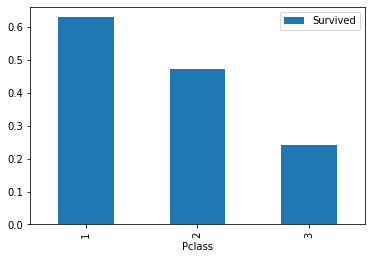

In [9]:
# Pclass
survived_pclass = df_train.pivot_table(index="Pclass", values="Survived")
survived_pclass

survived_pclass.plot.bar()
plt.show()

**Comment**:

5. Clearly that passengers with higher class have more chances to survice than the lower ones.
6. **Technical note**: The `Pclass` is categorized into `1`, `2` and `3`. It looks like that the numbers affect to the prediction because number 2 seems to be doubled number 1 and the same problem for number 3 (They seem to have a relationship but they don't!). It's better if we can create **dummy collumns** for each unique value in `Pclass`. For example, column `Pclass_1` contains only `0` and `1` in which `1` stands for the passengers who have this class. We can also apply this idea to feature `Sex`.

Above we work with `Sex` and `Pclass` which are 2 categorical features (2 classes). We continue to consider some other continuous features, starting with `Age`.

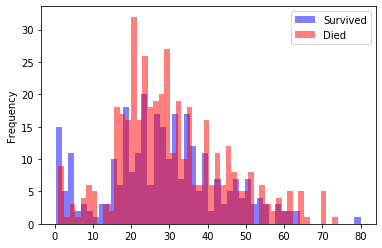

In [10]:
df_survived = df_train[df_train["Survived"] == 1] # df of only survived passengers
df_died = df_train[df_train["Survived"] == 0] # df of only died passengers

df_survived["Age"].plot.hist(alpha=0.5, color='blue', bins=50)
df_died["Age"].plot.hist(alpha=0.5, color='red', bins=50)

plt.legend(['Survived', 'Died'])
plt.show()

**Comment**:

7. As mentioned in comment 1, we need to fill in some missing values of this feature.
8. It's not so clear but we can see that there are some ranges in which the blue bars are higher than the red bars (survived passengers in these ranges of age are higher to survive) and vice versa. It's hard to work with this type of variables (continuous numbers). We can change the type of `Age` feature to a categorical type (For example, divide into 3 different groups of ages: `Missing`, `Child`, `Adult`) so that we can handle it more easily.

**Other comments:**

9. We haven't talk about `SibSp` and `Parch` yet. It's better if we consider them as 1 feature, let's say `Alone` which indicate that a passenger is alone or with some relatives on the ship.

## Preprocessing dataset

**Comment 1 & 2**: It's not necessary but we can remove some useless features from `df_train` and `df_test`.

In [11]:
df_train_main = df_train.drop(['Name', 'Fare', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test_main = df_test.drop(['Name', 'Fare', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# If you wanna drop directly columns from df_train (or df_test), you can use parameter `inplace=True`.

For **Comment 6**, we need to create a function to convert a feature to dummy features,

In [12]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

Convert `Sex` to 2 dummy columns,

In [13]:
df_train_main = create_dummies(df_train_main, 'Sex')
df_test_main = create_dummies(df_test_main, 'Sex')

The same for `Pclass`, we also create dummy columns corresponding to this feature (**Comment 6**).

In [14]:
df_train_main = create_dummies(df_train_main, 'Pclass')
df_test_main = create_dummies(df_test_main, 'Pclass')

In [15]:
df_train_main.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,male,22.0,1,0,0,1,0,0,1
1,2,1,1,female,38.0,1,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,1,0,0,0,1
3,4,1,1,female,35.0,1,0,1,0,1,0,0
4,5,0,3,male,35.0,0,0,0,1,0,0,1


**Comment 7 & 8**: We first fill the missing values and then convert the continuous ages to ranges.

In [16]:
def process_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young_Adult", 'Adult', 'Senior']

df_train_main = process_age(df_train_main, cut_points, label_names)
df_test_main = process_age(df_test_main, cut_points, label_names)

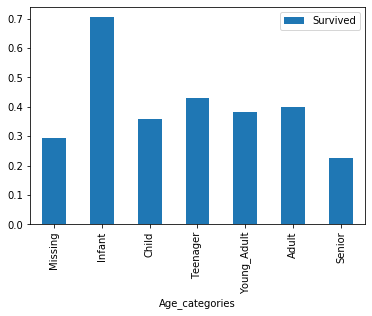

In [17]:
age_cat = df_train_main.pivot_table(index="Age_categories", values="Survived")
age_cat.plot.bar()
plt.show()

And then we create dummy columns corresponding to this feature `Age_categories`,

In [18]:
df_train_main = create_dummies(df_train_main, 'Age_categories')
df_test_main = create_dummies(df_test_main, 'Age_categories')

**Comment 9**: we create a new feature `Alone`.

In [19]:
data = [df_train_main, df_test_main]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 1
    dataset.loc[dataset['Relatives'] == 0, 'Alone'] = 0
    dataset['Alone'] = dataset['Alone'].astype(int)

In [20]:
df_train_main['Alone'].value_counts()

0    537
1    354
Name: Alone, dtype: int64

There are 357 out of all passengers go with their relatives.

Finally, we have the dataframe,

In [21]:
df_train_main.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,...,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young_Adult,Age_categories_Adult,Age_categories_Senior,Relatives,Alone
0,1,0,3,male,22.0,1,0,0,1,0,...,Young_Adult,0,0,0,0,1,0,0,1,1
1,2,1,1,female,38.0,1,0,1,0,1,...,Adult,0,0,0,0,0,1,0,1,1
2,3,1,3,female,26.0,0,0,1,0,0,...,Young_Adult,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,1,0,1,...,Young_Adult,0,0,0,0,1,0,0,1,1
4,5,0,3,male,35.0,0,0,0,1,0,...,Young_Adult,0,0,0,0,1,0,0,0,0


If you want, you can even remove the old features `Sex`, `Age`, `Age_categories`, `Relatives` and `Pclass`.

In [22]:
df_train_main.drop(['Sex', 'Age', 'Pclass', 'Age_categories', 'Relatives'], axis=1, inplace=True)
df_test_main.drop(['Sex', 'Age', 'Pclass', 'Age_categories', 'Relatives'], axis=1, inplace=True)

In [23]:
df_train_main.head()

,PassengerId,Survived,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young_Adult,Age_categories_Adult,Age_categories_Senior,Alone
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,2,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
2,3,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,5,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


## Methodology & Training & Predicting & Evaluating

The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as **survived or not**. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

There are several methods we can work with. First, we will try them all to find out the best one (temporarily) and then we will work more on this method to improve our prediction. 

### Split dataset into Train/Test (Dev) sets

Before training our model, we need to split our dataset (`df_train_main`) into train and test sets. Note that, this "test" set is different from the test set given from Kaggle (`df_test_main`).

In [24]:
from sklearn.linear_model import LogisticRegression

To be sure about our prediction, we need to split our training dataset into 2 sub-datasets, one for training, one for testing (It's not the `df_test` because this `df_test` doesn't have the `Survived` columns and it's only used for submitting our results!)!

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# features to be used in the training
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
           'Age_categories_Missing','Age_categories_Infant',
           'Age_categories_Child', 'Age_categories_Teenager',
           'Age_categories_Young_Adult', 'Age_categories_Adult',
           'Age_categories_Senior', 'Alone']
X = df_train_main[columns]
y = df_train_main['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=273)
print("X_train: {a}, X_test: {b}".format(a=X_train.shape[0], b=X_test.shape[0]))

X_train: 712, X_test: 179


In [27]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# make a prediction
y_predict = lr.predict(X_test)

It's time to evaluate our predictions.

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.8659217877094972


We need **confusion matrix** to understand this accuracy.

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
conf_matrix = confusion_matrix(y_test, y_predict)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,114,15
Died,9,41


How can we understand this confusion matrix? (Check [my note](https://note.dinhanhthi.com/confusion-matrix-and-f1-score)). There are totally 117 passengers who are survived and our model predicts wrongly 6 of them. There are totally 62 passengers who are died but we predict wrongly 18 of them (too many).

Above we split our dataset into 80%/20% sub-datasets but we are sure if there is overfitting with that split or not? To be more sure, we are going to use cross validation.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy') # 10 folds
print("Accuracy score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy score: 0.805 (+/- 0.070)


In [35]:
scores

array([0.8       , 0.82222222, 0.7752809 , 0.88764045, 0.80898876,
       0.79775281, 0.76404494, 0.76404494, 0.83146067, 0.79545455])

We see that, with 10 different folds, the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important.

---

Logistic Regression performs quickly and we can use it as a milestone to be compared with other methods. However, it seems that it doesn't give a best result. Let's try other methods.

## Random Forest

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0) # 1000 trees

## Apply to unseen data

It's time to use our model to predict `df_test_main`. Now, we don't need to split `df_train_main` anymore, we will use it to train our model (for a better one) and then apply to predict the `df_test_train`.

In [36]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
final_predict = lr.predict(df_test_main[columns])
final_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

## Creating an output file

In [37]:
final_ids = df_test_main["PassengerId"]
submission_df = {"PassengerId": final_ids,
                 "Survived": final_predict}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission.csv', index=False)

A file `titanic_submission.csv` will be created. You then submit it to Kaggle and see the result. That's finished!